<a href="https://colab.research.google.com/github/KarenParraA/ColabNotebooks/blob/main/Python_avanzado_Karen_Parra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller Final: Análisis exploratorio de datos de texto**

## Descripción

Se realizará el análisis de datos exploratorios sobre datos de texto acerca de tweets que han sido catalogados como sexistas.



## **Requisitos previos**

* Instalación de udpipe

In [1]:
pip install spacy_udpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.9/936.9 KB 12.4 MB/s eta 0:00:00


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.2 MB/s eta 0:00:00


+ Importación de nltk y udpipe

In [3]:
import nltk
import spacy_udpipe as udpipe

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


* Importación de librerías adicionales

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import ngrams

+ Importación de wordcloud

In [5]:
from wordcloud import WordCloud

In [6]:
from transformers import pipeline

* Conexión de Colab con Drive. Se deben copiar los dataset ejemplo en el drive a ser utilizado.

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


+ Lectura de dataset de tweets 

In [18]:
tweets_sd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sexism_data.csv')
tweets_sd.head()

,id,dataset,text,toxicity,sexist,of_id
0,0,other,MENTION3481 i didn't even know random was an o...,0.118180,False,-1
1,1,other,Bottom two should've gone! #mkr,0.251850,False,-1
2,2,callme,MENTION3111 MENTION3424 ladyboner deserves so ...,0.113331,False,-1
3,3,other,She shall now be known as Sourpuss #MKR #KatAn...,0.531153,False,-1
4,4,other,Tarah W threw a bunch of women under the bus s...,0.118718,False,-1


In [19]:
sexist = tweets_sd['sexist'] == True

In [20]:
tweets_bad = tweets_sd[sexist]
tweets_bad.head(3)

,id,dataset,text,toxicity,sexist,of_id
10,10,callme,All my sons have grown up with computer games ...,0.091025,True,-1
14,14,scales,Women have more intuition than men.,0.321429,True,-1
30,30,scales,Women do not belong in politics,0.451443,True,-1


In [22]:
tweets_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 10 to 13623
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1809 non-null   int64  
 1   dataset   1809 non-null   object 
 2   text      1809 non-null   object 
 3   toxicity  1809 non-null   float64
 4   sexist    1809 non-null   bool   
 5   of_id     1809 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 86.6+ KB


+ Módulos de NLTK

In [24]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Ejercicios** 

###**Limpieza y tokenización de tweets**

In [31]:
tweets_bad.reset_index(inplace = True,drop = True)

In [32]:
print(word_tokenize(tweets_bad.text[0]))

['All', 'my', 'sons', 'have', 'grown', 'up', 'with', 'computer', 'games', 'but', 'I', "'m", 'not', 'interested', '.', 'I', 'see', 'them', 'as', 'a', 'male', 'thing', '.', 'MENTION203']


In [144]:
stopwords.words('english')[0:10]
def word_tokenize_clean(sentence, to_lower=True, remove_special_chars=True, remove_numbers=True, remove_stopwords = True, remove_words=True, remove_html=True):
    if remove_html:
      sentence = re.sub("@[A-Za-z0-9_]+","", sentence)
      sentence = re.sub("#[[A-Za-z0-9_]+","", sentence)
      sentence = re.sub(r"https://t.co/\S+","", sentence)
      sentence = re.sub(r"www.\S+","", sentence)
      sentence = re.sub("[MENTION_]+","",sentence)
    token_clean = word_tokenize(sentence)
    token_clean = word_tokenize(sentence)
    words = ['here', 'for','amp','the',"'re","'s","'m","'u",'rt']
    if to_lower:
      token_clean = [i.lower() for i in token_clean]
    if remove_stopwords:
      token_clean = [i for i in token_clean if i not in stopwords.words('english')] 
    if remove_words:
      token_clean = [i for i in token_clean if i not in words]
    if remove_special_chars:
        token_clean = [re.sub(r'\W+', '', i) for i in token_clean]
    if remove_numbers:
        token_clean = [re.sub(r'[0-9]+', '', i) for i in token_clean] 
    token_clean = [i for i in token_clean if i!='']
    return token_clean

In [146]:
print(word_tokenize_clean(tweets_bad.text[10]))

['r', 'sexist', 'nt', 'believe', 'women', 'president']


Tokenizar todos los tweets del DATASET 

In [147]:
tweets_bad['text_tokenized'] = [word_tokenize_clean(i) for i in tweets_bad.text]

<ipython-input-147-a25e995f94b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_bad['text_tokenized'] = [word_tokenize_clean(i) for i in tweets_bad.text]


In [148]:
tweets_bad[['text','text_tokenized']]

,text,text_tokenized
0,All my sons have grown up with computer games ...,"[sons, grown, computer, games, interested, see..."
1,Women have more intuition than men.,"[women, intuition, men]"
2,Women do not belong in politics,"[women, belong, politics]"
3,"On the average, men are more arrogant than women","[n, average, men, arrogant, women]"
4,A woman will never be truly fulfilled in life ...,"[woman, never, truly, fulfilled, life, committ..."
...,...,...
1804,A man shouldn’t have to worry about birth-control,"[man, worry, birthcontrol]"
1805,Men cannot relate to other persons as well as ...,"[en, relate, persons, well, women]"
1806,"RT MENTION4556 call me sexist, but i hate to h...","[r, call, sexist, hate, hear, girls, argue, bo..."
1807,"As head of the household, the father should ha...","[head, household, father, final, authority, ch..."


In [149]:
stemmer = SnowballStemmer('english')
stemmer

In [150]:
print([stemmer.stem(i) for i in word_tokenize_clean(tweets_bad.text[0])])

['son', 'grown', 'comput', 'game', 'interest', 'see', 'male', 'thing']


Tokenizar y anotar el tweet ejemplo utilizando udpipe.

In [151]:
# Descargamos el modelo para el idioma inglés
udpipe.download('en')
# Cargamos el modelo
nlp_model_en = udpipe.load('en')
doc = nlp_model_en(tweets_bad.text[0])

Already downloaded a model for the 'en' language


In [152]:
[(token.text,token.lemma_,token.pos_) for token in doc]

[('All', 'all', 'DET'),
 ('my', 'my', 'PRON'),
 ('sons', 'son', 'NOUN'),
 ('have', 'have', 'AUX'),
 ('grown', 'grow', 'VERB'),
 ('up', 'up', 'ADP'),
 ('with', 'with', 'ADP'),
 ('computer', 'computer', 'NOUN'),
 ('games', 'game', 'NOUN'),
 ('but', 'but', 'CCONJ'),
 ('I', 'I', 'PRON'),
 ("'m", 'be', 'AUX'),
 ('not', 'not', 'PART'),
 ('interested', 'interested', 'ADJ'),
 ('.', '.', 'PUNCT'),
 ('I', 'I', 'PRON'),
 ('see', 'see', 'VERB'),
 ('them', 'they', 'PRON'),
 ('as', 'as', 'ADP'),
 ('a', 'a', 'DET'),
 ('male', 'male', 'NOUN'),
 ('thing', 'thing', 'NOUN'),
 ('.', '.', 'PUNCT'),
 ('MENTION', 'mention', 'NOUN'),
 ('203', '203', 'NUM')]

Formar un DF de tokens

In [153]:
def udpipe_annotate(nlp_model, data, text, doc_id,
                    to_lower=True, remove_special_chars=True, 
                    remove_numbers=True, remove_stopwords=True):
    df_results = []
    for i in range(0,data.shape[0]):
        doc_i = nlp_model(' '.join(word_tokenize_clean(data.loc[:,text].iloc[i],
                                                       to_lower=to_lower, 
                                                       remove_special_chars=remove_special_chars,
                                                       remove_numbers=remove_numbers, 
                                                       remove_stopwords=remove_stopwords))) 
        doc_id_i = data.loc[:,doc_id].iloc[i]
        data_i = [(doc_id_i, token.text, token.lemma_, token.pos_) for token in doc_i]
        df_i = pd.DataFrame(data_i, columns =['doc_id', 'token', 'lemma', 'pos'])
        df_results.append(df_i)
    result = pd.concat(df_results)
    return result

In [154]:
tweets_bad_annotated = udpipe_annotate(nlp_model_en,tweets_bad, 'text','id')

In [155]:
tweets_bad.shape

(1809, 7)

In [156]:
tweets_bad_annotated.shape

(14822, 4)

In [157]:
tweets_bad_annotated.pos.value_counts(ascending=False)

NOUN     6677
VERB     2846
ADJ      2158
ADV      1037
AUX       512
PART      413
ADP       400
PRON      205
X         158
INTJ      115
NUM        79
DET        78
SCONJ      76
CCONJ      35
PROPN      32
SYM         1
Name: pos, dtype: int64

In [158]:
tweets_bad_annotated.head(3)

,doc_id,token,lemma,pos
0,10,sons,son,NOUN
1,10,grown,grow,VERB
2,10,computer,computer,NOUN


In [160]:
tweets_bad_annotated.to_csv('/content/drive/MyDrive/Colab Notebooks/sexism_data_annotated.csv')

##**Exploración de tokens**

1. Realizar el cálculo tfidf tokenizando por palabras. Utiliza el dataset anotado. Grafica al final los tfidf más altos de los 2 tweets más largos que existan.

In [161]:
# tfidf MEdida de originalidad de una palabra, TF es mas importante porque se ve mas veces, originalidad de una palabra IDF es mas unica. 
#Frecuencia relativa de cada palabra
tf = tweets_bad_annotated.\
  groupby(['doc_id','lemma'], as_index=False).\
  agg(n=('token','count'))

In [162]:
#Numero de palabras de cada documento
tf_docid = tf.\
  groupby('doc_id', as_index=False).\
  agg(total_n=('n','sum'))
tf = tf.merge(tf_docid,on='doc_id',how='inner')

In [163]:
#Calculamos la frecuencia
tf['tf'] = tf.n/tf.total_n

In [164]:
tf.loc[tf.doc_id==14]

,doc_id,lemma,n,total_n,tf
8,14,intuition,1,3,0.333333
9,14,man,1,3,0.333333
10,14,woman,1,3,0.333333


In [165]:
#Calculamos el numero de documentos
n_documentos= tweets_bad_annotated.doc_id.nunique()
n_documentos

1809

In [166]:
#Calculamos el numero de documentos en los que aparece cada palabra
df=tweets_bad_annotated.\
  groupby(['lemma'],as_index=False).\
  agg(n_documents=('doc_id','nunique'))

In [167]:
#Calculamos el idf = log(# documentos totales/#documentos lemma)
df['idf']=np.log(n_documentos/df.n_documents)

In [168]:
df.head()

,lemma,n_documents,idf
0,'s,5,5.891092
1,I,8,5.421088
2,a,2,6.807382
3,aaaaa,1,7.500529
4,aaaaaact,1,7.500529


In [169]:
#Unir tf y df
tfidf = tf.merge(df, on ='lemma', how='inner')
tfidf['tfidf']=tfidf.tf*tfidf.idf

In [170]:
tfidf.head()

,doc_id,lemma,n,total_n,tf,n_documents,idf,tfidf
0,10,computer,1,8,0.125000,2,6.807382,0.850923
1,3141,computer,1,10,0.100000,2,6.807382,0.680738
2,10,game,1,8,0.125000,49,3.608709,0.451089
3,416,game,2,11,0.181818,49,3.608709,0.656129
4,592,game,1,11,0.090909,49,3.608709,0.328064


In [171]:
#tweet más largo
tf_docid.sort_values('total_n',ascending=False).head()

,doc_id,total_n
1634,12439,21
1422,10675,20
290,2033,19
1359,10187,19
101,752,18


In [172]:
tfidf.loc[tfidf.doc_id==1634].sort_values('tfidf',ascending=False)

,doc_id,lemma,n,total_n,tf,n_documents,idf,tfidf


In [173]:
list(tweets_bad.loc[tweets_bad.id==12439,'text'])

["Call me sexist but I can't stand playing golf behind females especially middle aged to elderly ones. SMH SPEED UP OR GO BACK TO DA KITCHEN."]

In [174]:
list(tweets_dc.loc[tweets_dc.id==10187,'text'])

['ppl always discredit Mingyus height but im tall for a girl and someone who is 180cm seems rly nicely tall to me so Mingyu at like 183cm is👍']

In [175]:
tfidf.loc[tfidf.doc_id==12439].sort_values('tfidf',ascending=False)

,doc_id,lemma,n,total_n,tf,n_documents,idf,tfidf
14101,12439,spd,1,21,0.047619,1,7.500529,0.357168
14100,12439,kch,1,21,0.047619,1,7.500529,0.357168
14099,12439,elderly,1,21,0.047619,1,7.500529,0.357168
12939,12439,da,1,21,0.047619,2,6.807382,0.324161
14097,12439,a,1,21,0.047619,2,6.807382,0.324161
13889,12439,middle,1,21,0.047619,2,6.807382,0.324161
13931,12439,golf,1,21,0.047619,3,6.401917,0.304853
9978,12439,sh,1,21,0.047619,6,5.708770,0.271846
10029,12439,behind,1,21,0.047619,9,5.303305,0.252538
9520,12439,especially,1,21,0.047619,10,5.197944,0.247521


In [176]:
tf.groupby('doc_id',as_index=False).agg(total=('tf','sum')).head(3)

,doc_id,total
0,10,1.0
1,14,1.0
2,30,1.0


In [177]:
tfidf_ejemplo=tfidf.loc[tfidf.doc_id==12439].sort_values('tfidf',ascending=False)

<AxesSubplot:xlabel='lemma', ylabel='tfidf'>

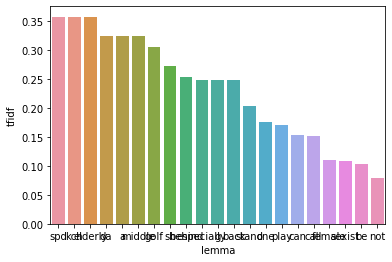

In [178]:
sns.barplot(x='lemma',y='tfidf',data=tfidf_ejemplo)

2. Realizar la nube de palabras para los lemmas del dataset anotado, usando solo VERB, PNOUN, NOUN y ADJ.

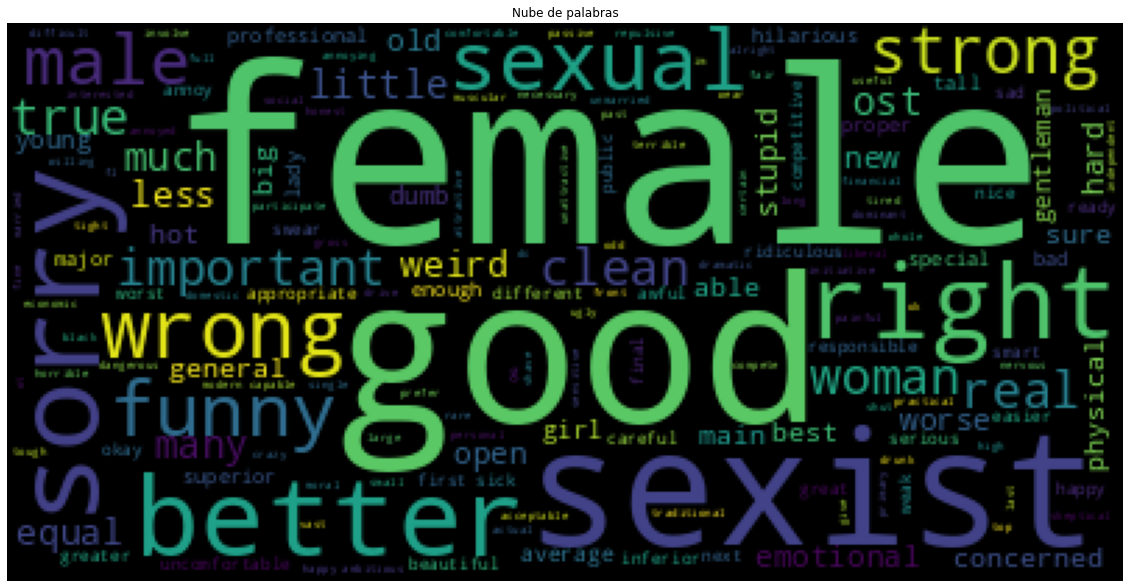

In [189]:
# 
wc =WordCloud().generate(' '.join(tweets_bad_annotated.loc[tweets_bad_annotated.pos.isin(['noun','ADJ']),'lemma']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis('off')
plt.title('Nube de palabras')
plt.show()

3. Realizar análisis de sentimientos con BERT. Analiza la polaridad de los scores mayores a 0.3

In [180]:
# La forma mas sencilla es con modelos pre entrenados, BERT de google es el mas famoso
classifier = pipeline('sentiment-analysis',model="nlptown/bert-base-multilingual-uncased-sentiment")

In [181]:
results=classifier(list(tweets_bad.text)[0:100])

In [182]:
#Dataset con sentimientos
tweets_bad_ejemplos=tweets_bad.iloc[:100]
scores=[]
polaridad=[]
for i in range(len(results)):
  scores.append(results[i]['score'])
  polaridad.append(results[i]['label'])
tweets_bad_ejemplos['score'] = scores
tweets_bad_ejemplos['polaridad'] = polaridad

<ipython-input-182-78f1512e7e19>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_bad_ejemplos['score'] = scores
<ipython-input-182-78f1512e7e19>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_bad_ejemplos['polaridad'] = polaridad


In [183]:
tweets_bad_ejemplos.head()

,id,dataset,text,toxicity,sexist,of_id,text_tokenized,score,polaridad
0,10,callme,All my sons have grown up with computer games ...,0.091025,True,-1,"[sons, grown, computer, games, interested, see...",0.389253,2 stars
1,14,scales,Women have more intuition than men.,0.321429,True,-1,"[women, intuition, men]",0.306082,3 stars
2,30,scales,Women do not belong in politics,0.451443,True,-1,"[women, belong, politics]",0.493110,1 star
3,45,scales,"On the average, men are more arrogant than women",0.530905,True,-1,"[n, average, men, arrogant, women]",0.561756,3 stars
4,55,scales,A woman will never be truly fulfilled in life ...,0.206631,True,-1,"[woman, never, truly, fulfilled, life, committ...",0.322988,1 star


In [184]:
tweets_bad_ejemplos.loc[tweets_bad_ejemplos.score>0.4,['text','polaridad']]

,text,polaridad
2,Women do not belong in politics,1 star
3,"On the average, men are more arrogant than women",3 stars
7,A female can't tell me nothing bout sports. So...,1 star
10,RT MENTION2783 MENTION3161 I'm not sexist but ...,1 star
14,Ever consider they're not FOR you and no one c...,1 star
15,MENTION3569 MENTION487: I'm not sexist but fuc...,1 star
16,"“She’s so beautiful she’s so precious,” he sai...",5 stars
17,RT MENTION1004 Go ahead and call me sexist but...,1 star
18,MENTION1059 I have only ever seen female OBGYN...,1 star
19,Men want power more than women do,5 stars


In [188]:
tweets_bad_ejemplos.text[50]

'A normal man should be wary of a woman who takes the initiative in courtship even though he may be very attracted to her'